In [2]:
from urllib import request

# trainデータのダウンロード
url = 'https://storage.googleapis.com/ai-standard/chapter_contents/data/lenna.png'
request.urlretrieve(url, 'lenna.png')

('lenna.png', <http.client.HTTPMessage at 0x7fefa4293fa0>)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
img = cv2.imread('lenna.png')

In [6]:
type(img)

numpy.ndarray

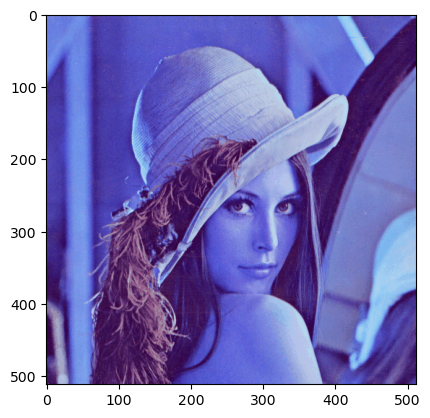

In [7]:
plt.imshow(img)

In [8]:
#色を変える
#img = cv.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)

In [9]:
img_save = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('new_lenna.png', img)

True

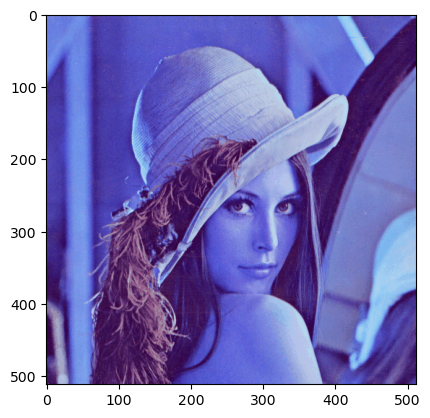

In [13]:
plt.imshow(img)

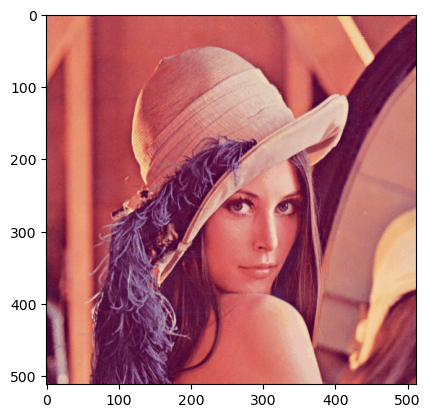

In [14]:
plt.imshow(img_save)

pre-processing

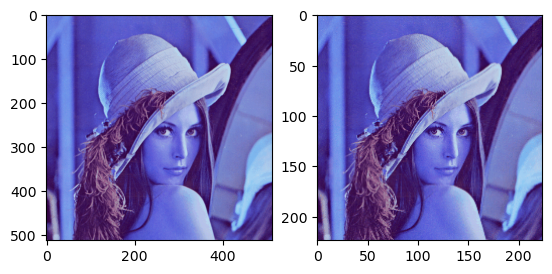

In [17]:
resized = cv2.resize(img, (224, 224))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(resized)

In [19]:
print(img.shape)
print(resized.shape)

(512, 512, 3)
(224, 224, 3)


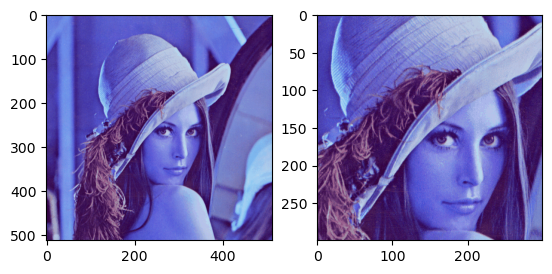

In [21]:
cropped_1 = img[100:400, 100:400, :]

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(cropped_1)

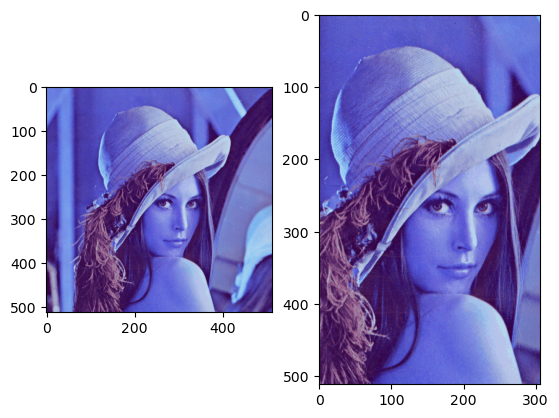

In [22]:
h, w, c = img.shape
cropped_2 = img[:, int(w*(1/5)): int(w*(4/5)), :]

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(cropped_2)

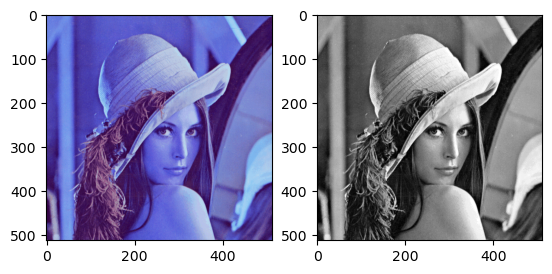

In [27]:
grayed = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(grayed)
plt.gray()

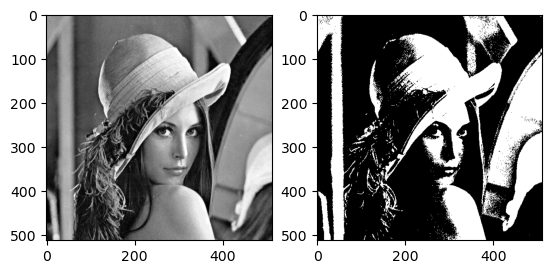

In [29]:
th, binary = cv2.threshold(grayed, 125, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.imshow(grayed)

plt.subplot(1, 2, 2)
plt.imshow(binary)
plt.gray()

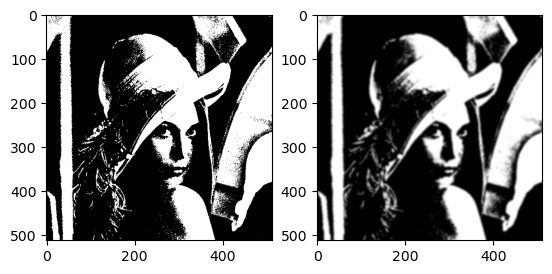

In [31]:
blurred = cv2.GaussianBlur(binary, (11, 11), 0)

plt.subplot(1, 2, 1)
plt.imshow(binary)

plt.subplot(1, 2, 2)
plt.imshow(blurred)

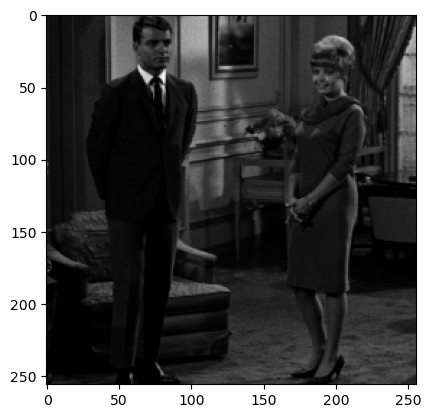

In [36]:
url = 'https://storage.googleapis.com/ai-standard/chapter_contents/data/4.1.02.tiff'
request.urlretrieve(url, '4.1.02.tiff')

img_2 = cv2.imread('4.1.02.tiff', 0)
plt.imshow(img_2)

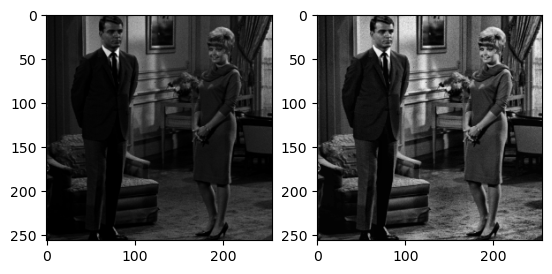

In [39]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
c11 = clahe.apply(img_2)

plt.subplot(1, 2, 1)
plt.imshow(img_2)

plt.subplot(1, 2, 2)
plt.imshow(c11)

data augumentation

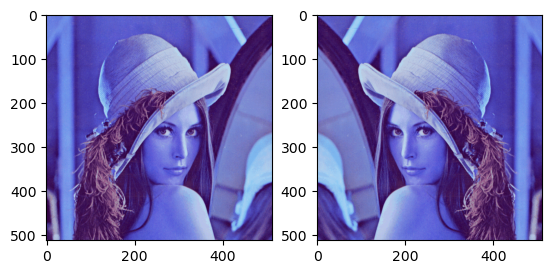

In [41]:
flipped = cv2.flip(img, 1)

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(flipped)

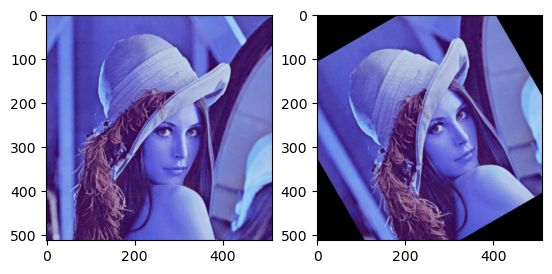

In [45]:
size = (img.shape[0], img.shape[1])
center = (int(size[0]/2), int(size[1]/2))

angle = 30
scale = 1.0

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(img, rotation_matrix, size)

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(rotated)

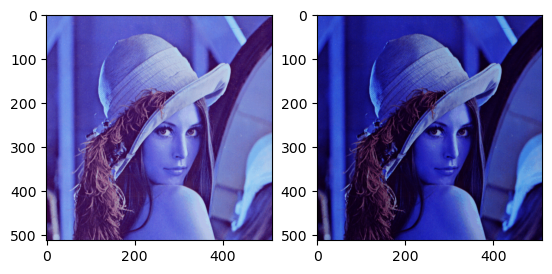

In [48]:
gamma = 0.5

look_up_table = np.zeros((256, 1), dtype='uint8')

for i in range(256):
    look_up_table[i][0] = 255 * pow(float(i)/255, 1.0/gamma)

img_gamma = cv2.LUT(img, look_up_table)

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_gamma)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


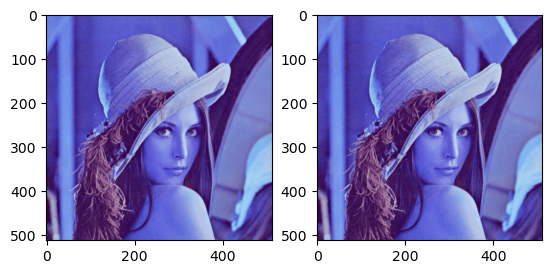

In [50]:
row, col, ch = img.shape
mean = 0
sigma = 5
noise = np.random.normal(mean, sigma, (row, col, ch))
noise = noise.reshape(row, col,  ch)

noised = img+noise
noised /= 255

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(noised)

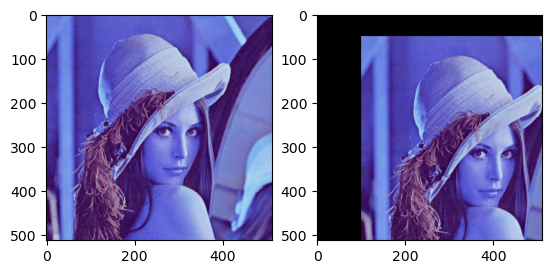

In [52]:
rows, cols, channels = img.shape

M = np.float32([[1, 0, 100], [0, 1, 50]])
moved = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(moved)

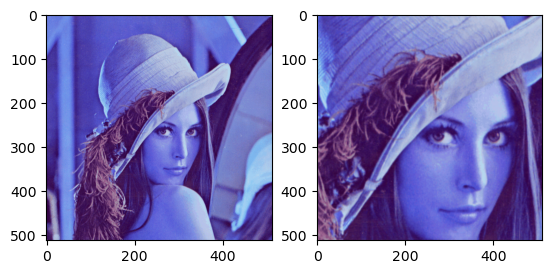

In [57]:
zoomed_in = cv2.resize(img, None, fx=2.0, fy=2.0)

height_1, width_1, channel_1 = img.shape
height_2, width_2, channel_2 = zoomed_in.shape

x = int((width_2-width_1)/2)
y = int((height_2-height_1)/2)

zoomed_in = zoomed_in[y:y+height_1, x:x+width_1]

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(zoomed_in)